# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Mouse_Study_Result_Merge = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
Mouse_Study_Result_Merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice.

n = len(pd.unique(Mouse_Study_Result_Merge['Mouse ID']))

print (n)


249


In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_dataframe = Mouse_Study_Result_Merge[Mouse_Study_Result_Merge.duplicated(['Mouse ID', 'Timepoint'])]
 

print(duplicate_mouse_dataframe["Mouse ID"].count() )

5


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Rows based on Mouse ID and Timepoint :")
duplicate_mouse_dataframe

Duplicate Rows based on Name and Age :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_Study_Result_Merge_clean = Mouse_Study_Result_Merge.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

In [6]:
# Checking the number of mice in the clean DataFrame.
n = len(pd.unique(Mouse_Study_Result_Merge_clean['Mouse ID']))

print (n)

248

## Summary Statistics

In [42]:
# import reduce function 
from functools import reduce

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mouse_Study_Result_Merge_clea_mean = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().reset_index(name="mean")
Mouse_Study_Result_Merge_clea_median = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().reset_index(name="median")
Mouse_Study_Result_Merge_clea_var = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().reset_index(name="var")
Mouse_Study_Result_Merge_clea_std = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().reset_index(name="std")
Mouse_Study_Result_Merge_clea_sem = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().reset_index(name="sem")
data_frames = [Mouse_Study_Result_Merge_clea_mean, Mouse_Study_Result_Merge_clea_median, Mouse_Study_Result_Merge_clea_var ,Mouse_Study_Result_Merge_clea_std , Mouse_Study_Result_Merge_clea_sem]
Mouse_Study_Statistics = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), data_frames)

#display(Mouse_Study_Statistics)
Mouse_Study_Statistics.style.hide_index()
#Mouse_Study_Statistics.to_string(index=False)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


C:\Users\RMaji\AppData\Local\Temp\ipykernel_8744\848462455.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  Mouse_Study_Statistics.style.hide_index()


Drug Regimen,mean,median,var,std,sem
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
print ( "                                Tumor Volume (mm3) ")
Mouse_Study_Statistics.style.hide_index()

                                Tumor Volume (mm3) 


C:\Users\RMaji\AppData\Local\Temp\ipykernel_8744\1250219387.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  Mouse_Study_Statistics.style.hide_index()


Drug Regimen,mean,median,var,std,sem
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

Text(0, 0.5, '# of observed Mouse Timepoints')

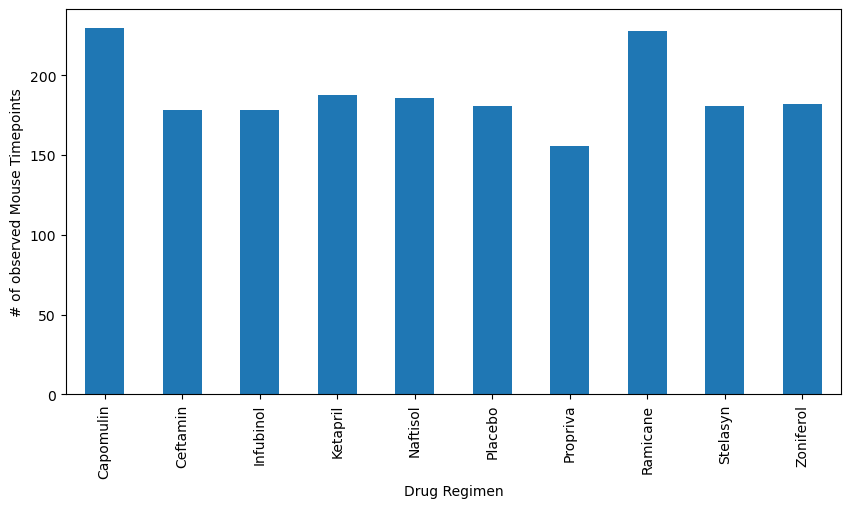

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count_dataframe = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Mouse ID"].count().reset_index(name="Count")
mouse_count_dataframe
bar_plot_panda= mouse_count_dataframe.plot.bar(x='Drug Regimen', y='Count', rot=90,figsize=(10, 5),legend=False)
bar_plot_panda.set_ylabel("# of observed Mouse Timepoints")

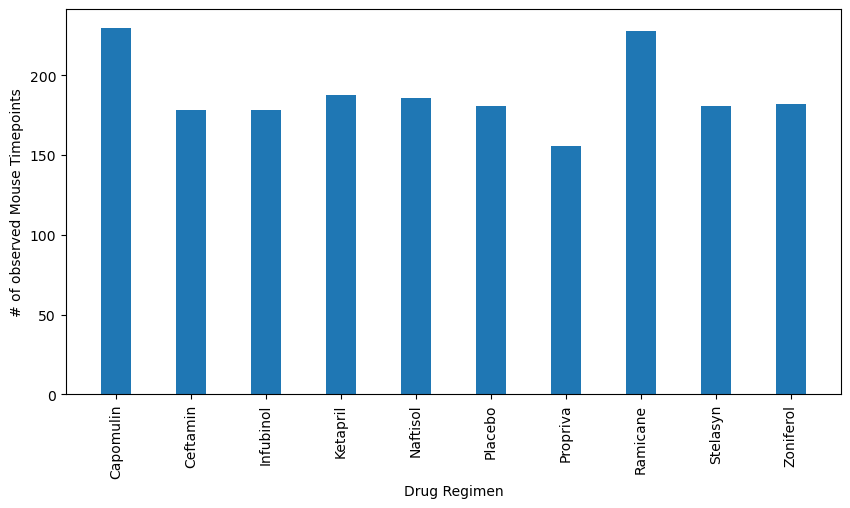

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_name = list(mouse_count_dataframe["Drug Regimen"])
counts = list(mouse_count_dataframe["Count"])

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(drug_name, counts, 
        width = 0.4)
 
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.show()

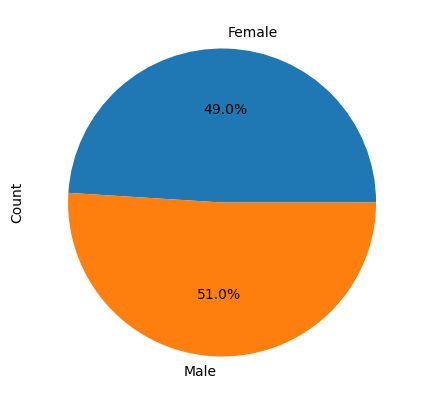

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_count_dataframe_sex = Mouse_Study_Result_Merge_clean.groupby("Sex")["Mouse ID"].count().reset_index(name="Count")
Total_count = len(Mouse_Study_Result_Merge_clean. index)

mouse_count_dataframe_sex["Count"] = ((mouse_count_dataframe_sex["Count"] / Total_count ) * 100).round(0) 
mouse_count_dataframe_sex
sex_labels=['Female','Male']
plot = mouse_count_dataframe_sex.plot.pie(y='Count', figsize=(5, 5),labels=sex_labels,legend=False,autopct='%1.1f%%')


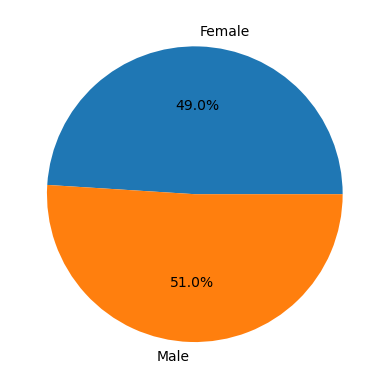

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import numpy as np
y = np.array(mouse_count_dataframe_sex["Count"])
sex_labels=['Female','Male']
plt.pie(y,labels=sex_labels,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [201]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
dataframe = pd.DataFrame(Mouse_Study_Result_Merge_clean, columns = ['Mouse ID','Timepoint', 'Tumor Volume (mm3)' , 'Drug Regimen'])
rslt_df_drug_regimen = dataframe[(dataframe['Drug Regimen'] == 'Capomulin') |(dataframe['Drug Regimen'] == 'Ramicane') | (dataframe['Drug Regimen'] == 'Infubinol') | (dataframe['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
rslt_df_drug_regimen_last_timepoint = rslt_df_drug_regimen[(rslt_df_drug_regimen['Timepoint'] == 45)]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
rslt_df_drug_regimen_last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
9,k403,45,22.050126,Ramicane
19,s185,45,23.343598,Capomulin
29,x401,45,28.484033,Capomulin
39,m601,45,28.430964,Capomulin
49,g791,45,29.128472,Ramicane
...,...,...,...,...
1797,x822,45,61.386660,Ceftamin
1813,y163,45,67.685569,Infubinol
1845,y769,45,68.594745,Ceftamin
1855,y865,45,64.729837,Ceftamin


In [233]:
# Put treatments into a list for for loop (and later for plot labels)
rslt_df_drug_regimen_last_timepoint
 
dataframe = pd.DataFrame(Mouse_Study_Result_Merge_clean, columns = [ 'Tumor Volume (mm3)' , 'Drug Regimen'])


#dataframe_drun_regimen
dataframe_Capomulin = dataframe[(dataframe['Drug Regimen'] == 'Capomulin')] 
dataframe_Ramicane = dataframe[(dataframe['Drug Regimen'] == 'Ramicane')]
dataframe_Infubinol = dataframe[(dataframe['Drug Regimen'] == 'Infubinol')]
dataframe_Ceftamin = dataframe[(dataframe['Drug Regimen'] == 'Ceftamin')]
dataframe_Capomulin_all4 = dataframe[(dataframe['Drug Regimen'] == 'Capomulin') | 
                                     (dataframe['Drug Regimen'] == 'Ramicane')  | 
                                     (dataframe['Drug Regimen'] == 'Infubinol') |
                                     (dataframe['Drug Regimen'] == 'Ceftamin')]                                              ]
# Create empty list to fill with tumor vol data (for plotting)
list_Capomulin = dataframe_Capomulin["Tumor Volume (mm3)"].values.tolist()
list_Ramicane = dataframe_Ramicane["Tumor Volume (mm3)"].values.tolist()
list_Infubinol = dataframe_Infubinol["Tumor Volume (mm3)"].values.tolist()
list_Ceftamin = dataframe_Ceftamin["Tumor Volume (mm3)"].values.tolist()


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#For Capomulin
q3_Capomulin, q1_Capomulin = np.percentile(list_Capomulin, [75, 25])
IQR_Capomulin = q3_Capomulin - q1_Capomulin
upper_bound_Capomulin = q3_Capomulin + 1.5 * IQR_Capomulin
lower_bound_Capomulin = q1_Capomulin - 1.5 * IQR_Capomulin
list_Capomulin_withinrange = []

for item in list_Capomulin :
    if item <= upper_bound_Capomulin or item >= lower_bound_Capomulin :
        list_Capomulin_withinrange.append(item)

print(f" Total Capomulin data {len(list_Capomulin)}")  

print(f" Total Capomulin data within range {len(list_Capomulin_withinrange)}")

#For Ramicane
q3_Ramicane, q1_Ramicane = np.percentile(list_Ramicane, [75, 25])
IQR_Ramicane = q3_Ramicane - q1_Ramicane
upper_bound_Ramicane = q3_Ramicane + 1.5 * IQR_Ramicane
lower_bound_Ramicane = q1_Ramicane - 1.5 * IQR_Ramicane
list_Ramicane_withinrange = []

for item in list_Ramicane :
    if item <= upper_bound_Ramicane or item >= lower_bound_Ramicane :
        list_Ramicane_withinrange.append(item)

print(f" Total Ramicane data {len(list_Ramicane)}")  

print(f" Total Ramicane data within range {len(list_Ramicane_withinrange)}")

#For Infubinol
q3_Infubinol, q1_Infubinol = np.percentile(list_Infubinol, [75, 25])
IQR_Infubinol = q3_Infubinol - q1_Infubinol
upper_bound_Infubinol = q3_Infubinol + 1.5 * IQR_Infubinol
lower_bound_Infubinol = q1_Infubinol - 1.5 * IQR_Infubinol
list_Infubinol_withinrange = []

for item in list_Infubinol :
    if item < upper_bound_Infubinol or item > lower_bound_Infubinol :
        list_Infubinol_withinrange.append(item)

print(f" Total Infubinol data {len(list_Infubinol)}")  

print(f" Total Infubinol data within range {len(list_Infubinol_withinrange)}")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
#For Ceftamin
q3_Ceftamin, q1_Ceftamin = np.percentile(list_Ceftamin, [75, 25])
IQR_Ceftamin = q3_Ceftamin - q1_Ceftamin
upper_bound_Ceftamin = q3_Ceftamin + 1.5 * IQR_Ceftamin
lower_bound_Ceftamin = q1_Ceftamin - 1.5 * IQR_Ceftamin
list_Ceftamin_withinrange = []

for item in list_Ceftamin :
    if item < upper_bound_Ceftamin or item > lower_bound_Ceftamin :
        list_Ceftamin_withinrange.append(item)

print(f" Total Ceftamin data {len(list_Ceftamin)}")  

print(f" Total Ceftamin data within range {len(list_Ceftamin_withinrange)}")
    
    # add subset 

    
    # Determine outliers using upper and lower bounds


 Total Capomulin data 230
 Total Capomulin data within range 230
 Total Ramicane data 228
 Total Ramicane data within range 228
 Total Infubinol data 178
 Total Infubinol data within range 178
 Total Ceftamin data 178
 Total Ceftamin data within range 178


<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

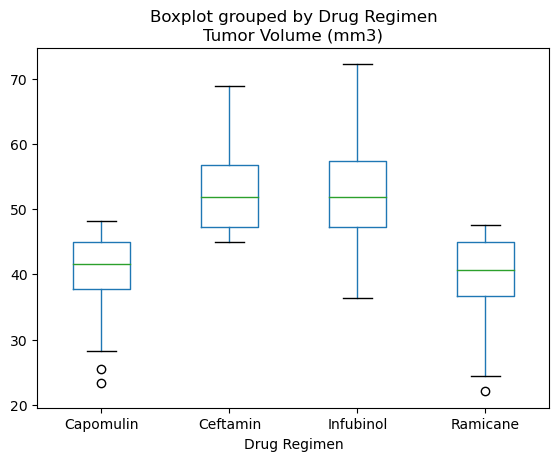

In [236]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
dataframe_Capomulin_all4 = dataframe[(dataframe['Drug Regimen'] == 'Capomulin') | 
                                     (dataframe['Drug Regimen'] == 'Ramicane')  | 
                                     (dataframe['Drug Regimen'] == 'Infubinol') |
                                     (dataframe['Drug Regimen'] == 'Ceftamin')]   
dataframe_Capomulin_all4.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False)

## Line and Scatter Plots

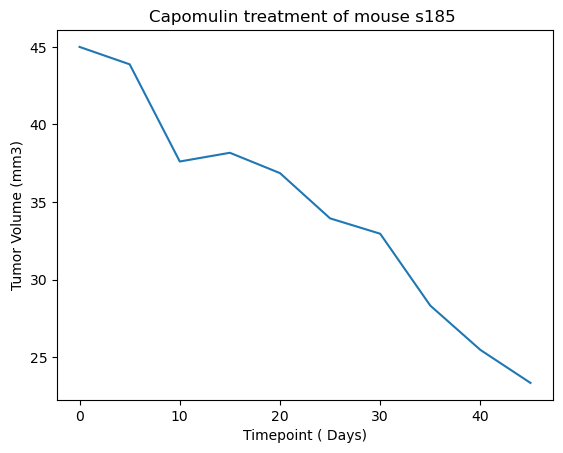

In [103]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
dataframe = pd.DataFrame(Mouse_Study_Result_Merge_clean, columns = ['Mouse ID','Timepoint', 'Tumor Volume (mm3)' , 'Drug Regimen'])
rslt_df = dataframe[dataframe['Drug Regimen'] == 'Capomulin']
rslt_df_s185 = rslt_df[rslt_df['Mouse ID'] == 's185']
rslt_df_s185
plt.plot(rslt_df_s185["Timepoint"], rslt_df_s185["Tumor Volume (mm3)"])
plt.xlabel("Timepoint ( Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin treatment of mouse s185 ')
plt.show()

C:\Users\RMaji\AppData\Local\Temp\ipykernel_8744\319197684.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rslt_df_Capomulin_avgweight = rslt_df_Capomulin.groupby(rslt_df_Capomulin['Weight (g)']).mean()
C:\Users\RMaji\AppData\Local\Temp\ipykernel_8744\319197684.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_by_tumor_volume = rslt_df_Capomulin.groupby(rslt_df_Capomulin['Weight (g)']).mean()


[Text(0.5, 0, 'Weight (g)'), Text(0, 0.5, 'Average Tumor Volume(mm3)')]

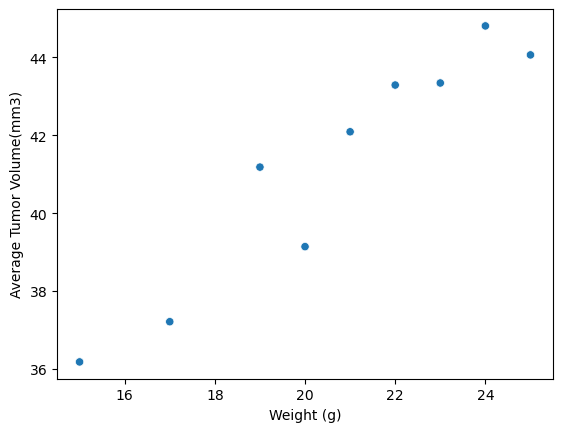

In [146]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import seaborn as sns

dataframe = pd.DataFrame(Mouse_Study_Result_Merge_clean, columns = ['Weight (g)', 'Tumor Volume (mm3)' , 'Drug Regimen'])
rslt_df_Capomulin = dataframe[dataframe['Drug Regimen'] == 'Capomulin']

rslt_df_Capomulin_avgweight = rslt_df_Capomulin.groupby(rslt_df_Capomulin['Weight (g)']).mean()


df_grouped_by_tumor_volume = rslt_df_Capomulin.groupby(rslt_df_Capomulin['Weight (g)']).mean()

scatterplot = sns.scatterplot(data = df_grouped_by_tumor_volume,legend=False)
scatterplot.set(xlabel='Weight (g)', ylabel='Average Tumor Volume(mm3)')






## Correlation and Regression

In [185]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
import scipy.stats as stats
import altair as alt

rslt_df_Capomulin = Mouse_Study_Result_Merge_clean[Mouse_Study_Result_Merge_clean['Drug Regimen'] == 'Capomulin']

rslt_df_Capomulin_avgweight = rslt_df_Capomulin.groupby(rslt_df_Capomulin['Weight (g)']).mean()
rslt_df_Capomulin_avgweight_withcol = rslt_df_Capomulin_avgweight["Tumor Volume (mm3)"].reset_index(name="AVG Tumor Volume")
rslt_df_Capomulin_avgweight_withcol
r, p = stats.pearsonr(x, y)

x = np.array(rslt_df_Capomulin_avgweight_withcol['Weight (g)'])

y = np.array(rslt_df_Capomulin_avgweight_withcol['AVG Tumor Volume'])


fig = alt.Chart(rslt_df_Capomulin_avgweight_withcol).mark_point().encode(x='Weight (g)', y='AVG Tumor Volume')
fig.encoding.x.scale = alt.Scale(domain=[12, 28])
fig.encoding.y.scale = alt.Scale(domain=[35, 50])

final_plot = fig + fig.transform_regression('Weight (g)','AVG Tumor Volume').mark_line()
print (f"correlation coefficient value for entire Capomulin regimen is : {r.round(2)}")
final_plot



correlation coefficient value for entire Capomulin regimen is : 0.95


C:\Users\RMaji\AppData\Local\Temp\ipykernel_8744\3636029922.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rslt_df_Capomulin_avgweight = rslt_df_Capomulin.groupby(rslt_df_Capomulin['Weight (g)']).mean()


alt.LayerChart(...)